In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading dataset

In [3]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
data2=pd.get_dummies(data,columns=['Undergrad','Urban'],drop_first=True)
data2.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0


In [17]:
data3=pd.get_dummies(data2,columns=['Marital.Status'])
data3.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,0,1,0,0,1
1,33700,134075,18,1,1,1,0,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,1,0,0,1
4,81002,27533,28,0,0,0,1,0


<b> Here we are taking taxable income as dependent variable as we have to build model to know the person's tax income is in risky or good.so it is  categorised by income<30000 as risky and income>30000 as good</b>

In [18]:
data3["Taxable.Income"] = pd.cut(data3["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
data3.head()


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,Good,50047,10,0,1,0,0,1
1,Good,134075,18,1,1,1,0,0
2,Good,160205,30,0,1,0,1,0
3,Good,193264,15,1,1,0,0,1
4,Good,27533,28,0,0,0,1,0


In [22]:
data4=pd.get_dummies(data3,columns=['Taxable.Income'],drop_first=True)
data4.head()

,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Good
0,50047,10,0,1,0,0,1,1
1,134075,18,1,1,1,0,0,1
2,160205,30,0,1,0,1,0,1
3,193264,15,1,1,0,0,1,1
4,27533,28,0,0,0,1,0,1


In [24]:
x=data4.iloc[:,0:7]
y=data4.iloc[:,7]

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=4)

In [29]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(420, 7) (420,) (180, 7) (180,)


# Decision Tree Classifier using Entropy Criteria

In [62]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

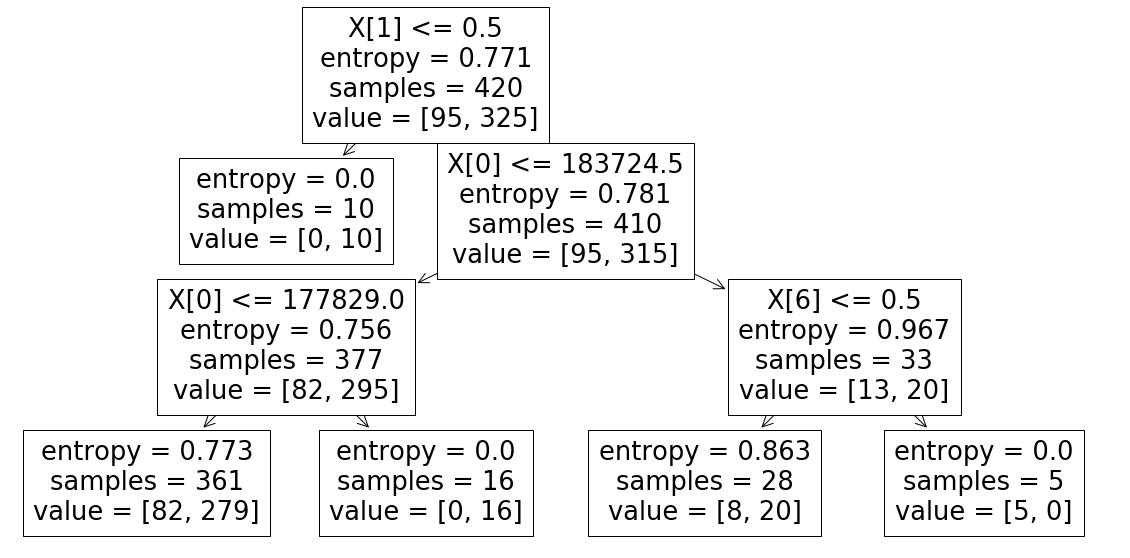

In [63]:
#PLoting the decision tree
plt.figure(figsize =(20, 10)) 
tree.plot_tree(model1);

In [64]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single'],
      dtype='object')

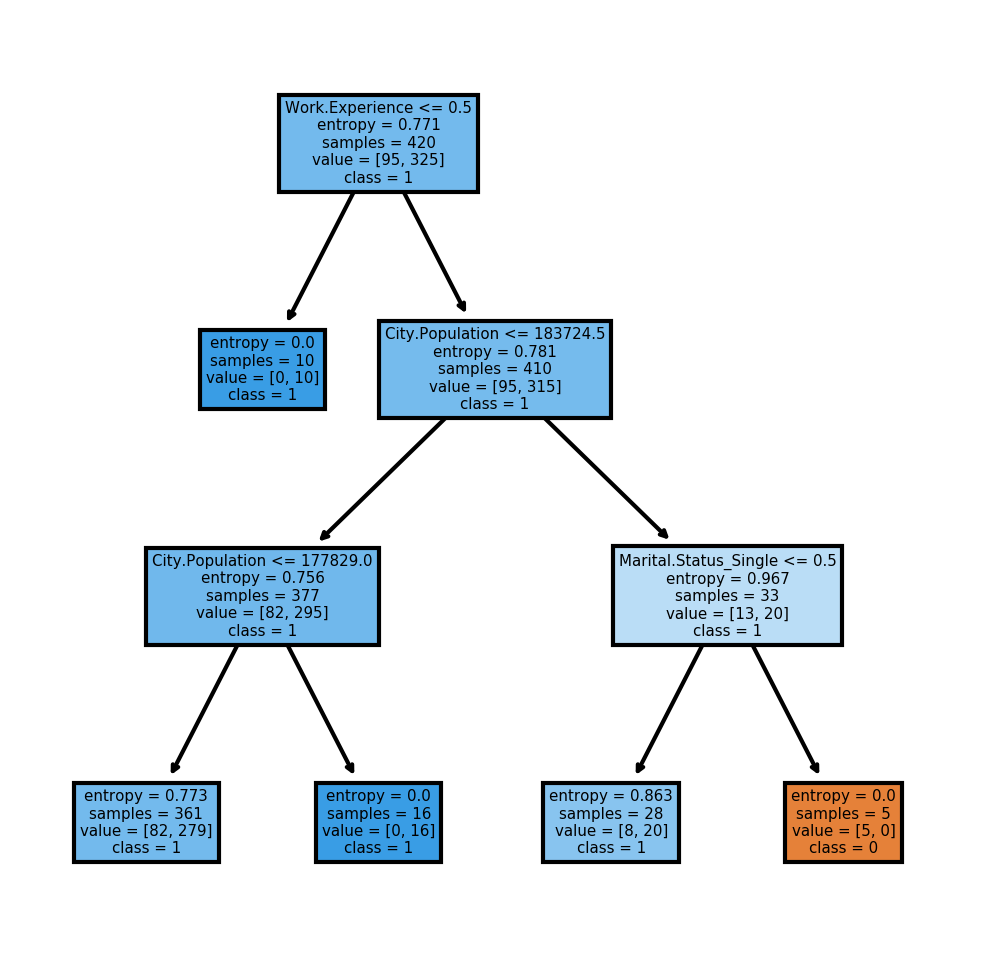

In [65]:
fn=['City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [66]:
preds = model1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    171
0      9
dtype: int64

In [67]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income_Good,,
0,0,29
1,9,142


In [ ]:
# The accuracy of model using entropy is 78%

In [68]:
np.mean(preds==y_test)

0.7888888888888889

# Decision Tree Classifier (CART) using Gini Criteria

In [69]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [70]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

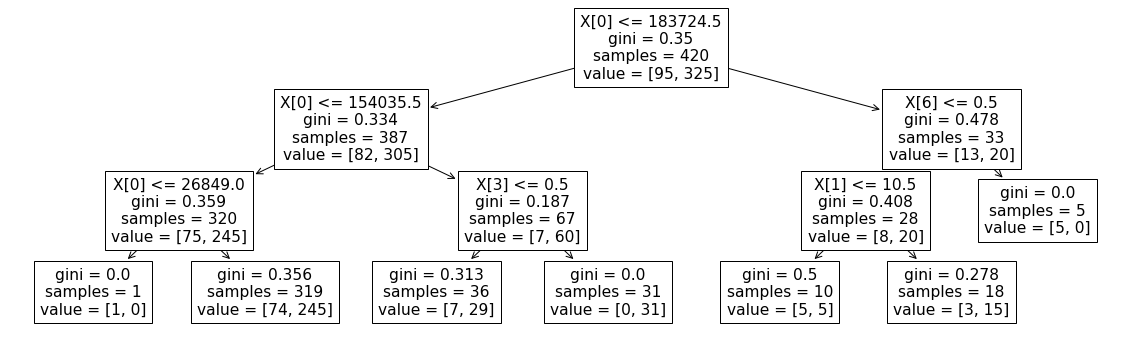

In [71]:
#PLot the decision tree
plt.figure(figsize =(20, 6)) 
tree.plot_tree(model_gini);

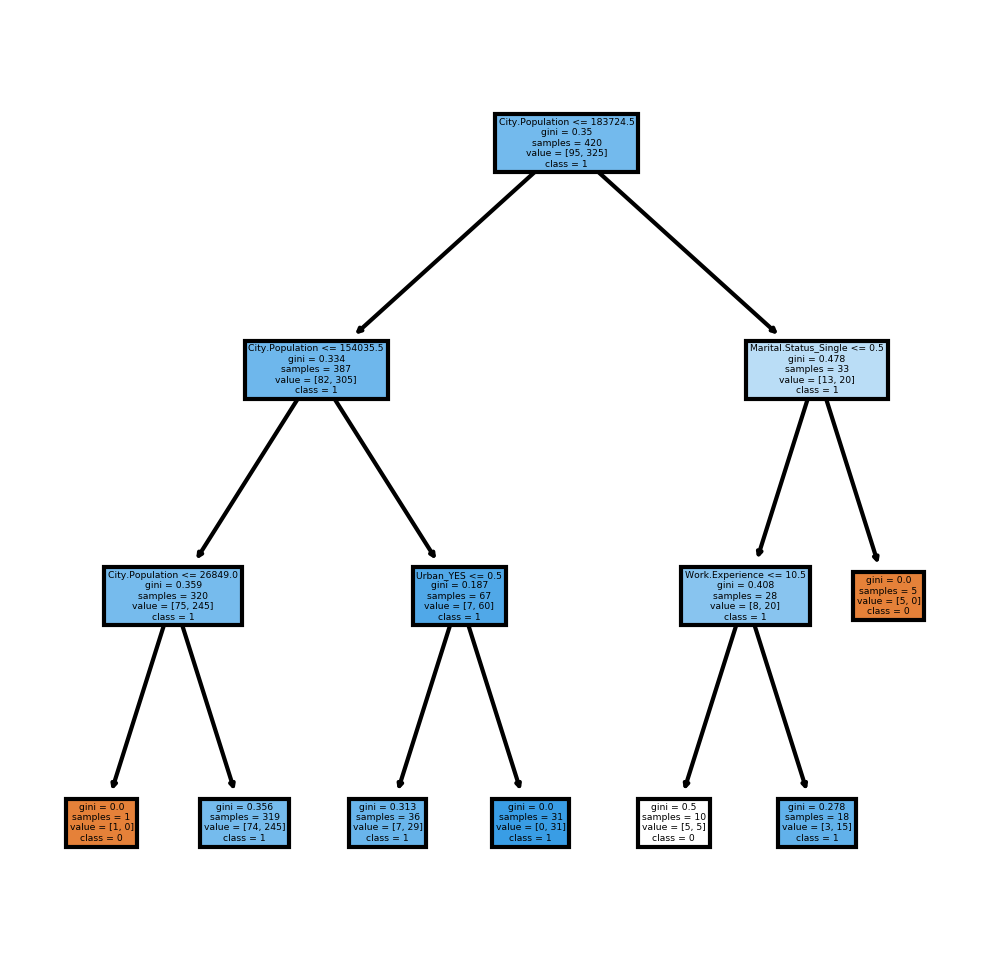

In [72]:
fn=['City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
# The accuracy of model using entropy is 77%

In [73]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
pred
np.mean(pred==y_test)

0.7777777777777778